<a href="https://colab.research.google.com/github/droyktton/clases_ME_IB/blob/main/ME_2025_EstadisticaCuantica_Bosones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bosones

[¿Quiénes son bosones?](https://en.wikipedia.org/wiki/List_of_particles)

Por un lado tenemos a las partículas elementales, los "bosones de medida" o de "gauge", que son portadores de interacciones, como el fotón (media la interacción electromagnética), los gluones (interacción fuerte), y el W y Z (mediadores de la interacción débil). Todos estos tienen espín 1, por lo tanto bosones.
También hay bosones elementales de espín 0,  los bosones escalares, donde está el boson de Higgs.

Los fotones y gluons son especiales porque no tienen masa, y eso hace que no puedan tener la proyección 0 de su espín. El análogo del espín $\pm 1$ es en el caso del fotón sus estados de polarización circular,  izquierda/derecha, o helicidad.  

También estaría entre los bosones el gravitón, pero todavía está en discusión.


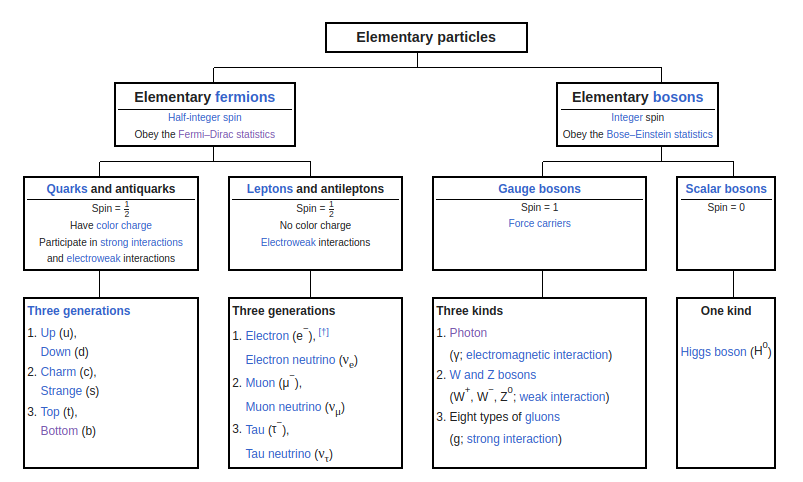

y por el otro tenemos a las partículas compuestas, como los hadrones, los cuales algunos pueden ser bosones, como los mesones, piones por ejemplo.





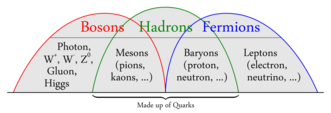


y por otro tenemos a los núcleos, los átomos, sus isotopos, y a las moléculas, que pueden ser fermiones o bosones.

Una regla bastante general es que *una partícula que contiene un número par de fermiones es un bosón*. Incluso si hay una mezcla de bosones y fermiones idénticos o no entre sí, funciona la regla.  

Algunos Ejemplos de Fermiones compuestos:

* Helio 4 (2 protones, 2 neutrones, 2 electrones).
* Carbono 12 (6 protones, 6 neutrones, 6 electrones).
* Hidrógeno 2 y muchas otras moleculas.
* Fonones, y otras muchas cuasipartículas...


# Gas degenerado de Bosones

Ahora abordaremos la mecánica estadística de bosones idénticos no interactuantes, o "bosones degenerados".

Recordemos antes las tres estadísticas que vimos, Fermi-Dirac, Bose-Einstein y Maxwell-Boltzmann,

In [ ]:
#@title Estadísticas de Bose-Einstein, Fermi-Dirac y Maxwell-Boltzmann

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def fermi_dirac(energy, temperature, chemical_potential):
  """Fermi-Dirac occupation number."""
  if temperature == 0:
    return 1.0 if energy < chemical_potential else 0.0
  else:
    return 1.0 / (np.exp((energy - chemical_potential) / temperature) + 1.0)

def bose_einstein(energy, temperature, chemical_potential):
  """Bose-Einstein occupation number."""
  if temperature == 0:
    return float('inf') if energy < chemical_potential else 0.0
  else:
    return 1.0 / (np.exp((energy - chemical_potential) / temperature) - 1.0)


def maxwell_boltzmann(energy, temperature, chemical_potential):
  """Maxwell-Boltzmann occupation number."""
  return np.exp(-(energy - chemical_potential) / temperature)


def plot_occupations(temperature, chemical_potential):
  energy = np.linspace(-2, 2, 100)
  fd = [fermi_dirac(e, temperature, chemical_potential) for e in energy]
  be = [bose_einstein(e, temperature, chemical_potential) for e in energy]
  mb = [maxwell_boltzmann(e, temperature, chemical_potential) for e in energy]

  plt.figure(figsize=(6, 4))
  plt.plot(energy, fd, '-o', label='Fermi-Dirac')
  plt.plot(energy, be, 'o', label='Bose-Einstein')
  plt.plot(energy, mb, '-o', label='Maxwell-Boltzmann')
  plt.xlabel('Energy')
  plt.ylabel('Occupation Number')
  #plt.yscale('log')
  plt.ylim([0.01, 5])
  plt.legend()
  plt.title('Occupation Numbers vs. Energy')

  # Add a vertical line at the chemical potential
  plt.axvline(x=chemical_potential, color='red', linestyle='--', label='Chemical Potential')
  plt.legend()

  plt.show()


interact(plot_occupations,
         temperature=FloatSlider(value=0.5, min=0.01, max=2.0, step=0.1),
         chemical_potential=FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.1))

### Restricción sobre el potencial químico

Como el número de ocupación medio de un estado $i$
\begin{align}
\langle n_i \rangle_+ = \frac{1}{e^{\beta ({\cal E}(i)-\mu)}-1}
\end{align}
debe ser positivo, necesariamente ${\cal E}(i)-\mu>0$ $\forall i$. Es decir, los valores del potencial químicos tienen que cumplir

$$
\boxed{
\mu \leq \min_i[{\cal E}(i)]}$$

Cuando nos aproximamos al límite termodinámico $\mu$ se puede acercar muchísimo a ${\cal E}_{min}$, porque cuando $T\to 0$ ($\beta \to \infty$) todas las partículas se van al fundamental (al cual indexamos como $i=0$) y

\begin{align}
N \approx \langle n_0 \rangle_+ = \frac{1}{e^{\beta ({\cal E}(0)-\mu)}-1} \gg 1
\end{align}

lo que implica que $\beta ({\cal E}(0)-\mu) \approx 0$. Como asumimos que $\beta \to \infty$ en el argumento, necesariamente $\mu - {\cal E}(0) \ll k_B T \to 0$. Es decir que la igualdad ${\cal E}(0)=\mu$ es alcanzable en el límite termodinámico si $T \to 0$.

*Veremos en breve que en realidad ${\cal E}(0)\approx \mu$ es alcanzable a una temperatura finita $T_c$ en el límite termodinámico, y se mantiene ahí clavado bajando más $T$...*




### Misteriosa saturación


Para fijar ideas vamos a enfocarnos al *gas no relativista de bosones en una caja*,
con relación de dispersión $\epsilon_{{\bf k},\alpha}=\hbar^2 k^2/2m$ (degenerado en $\alpha$). Por tanto ${\cal E}_{min}=0$ y la densidad de estados es

$$g(\epsilon) = \left( \frac{2m}{\hbar^2} \right)^{3/2} \frac{g_s V}{2\pi^2} \sqrt{\epsilon} $$

o mas simplemente $g(ϵ)=A V \epsilon^{1/2}$, con
$A=\left( \frac{2m}{\hbar^2} \right)^{3/2} \frac{g_s}{2\pi^2}$.

Para el gas de bose no relativista en tres dimensiones teníamos, usando

\begin{align}
N &= \int d\epsilon
\frac{g(\epsilon)}{e^{\beta(\epsilon-\mu)}-1}=
\int d\epsilon \frac{g(\epsilon)}{z^{-1}e^{\beta \epsilon}-1} \\
&= A V \int d\epsilon \frac{\epsilon^{1/2}}{z^{-1}e^{\beta \epsilon}-1}
= V \frac{g_s}{\lambda_T^3} f_{3/2}^+(z)
\end{align}

donde $\lambda_T=h/\sqrt{2\pi m k_B T}$.
La *densidad de bosones* $n=N/V$ entonces cumple

\begin{align}
n = \frac{g_s}{\lambda_T^3}f^+_{3/2}(z)
\end{align}

>Recordar de paso que la misma relación pero con $f^-_{3/2}(z)$ aplica a los fermiones con la misma relación de dispersión y dimensión del espacio, y que expresiones similares, pero con distintas funciones $f^\eta_m$, valen para otras dimensiones y relaciones de dispersión que lleven a algo de la forma $g(\epsilon)\sim \epsilon^s$.
Más aún, sería muy buena aproximación la relación aunque $g(\epsilon)$ se comportara así solamente donde el número de ocupación o función de Bose es importante.



---


Recordemos la definicion de las funciones especiales $f_m^\eta(z)$:


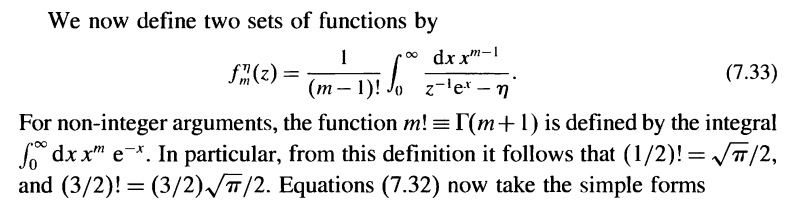



---



La ecuación anterior para $n$ nos permite en principio encontrar $z=z(T,V,N)$. Si fijamos $n$ y $T$, el $\mu$ queda determinado.

Para encontrar los efectos de degeneración debemos ver que pasa si cambiamos $n \lambda_T^3$. Si lo aumentamos $f^+_{3/2}(z)$ debe aumentar, implicando un cambio de $\mu$. Para saber en que dirección ocurre viene bien dibujar la función.  

Si dibujamos $f^+_{3/2}(z)$ encontramos que es monotónicamente creciente y que satura al máximo valor fisicamente admisible de $z=1$ o $\mu=0$.


O sea, no se puede evaluar más allá de $z=1$ porque da ¡un número complejo!

* Pueden chequearlo ustedes mismos [aqui](https://www.wolframcloud.com/obj/f369fb1b-20a3-49d0-9057-b01708cb280e)


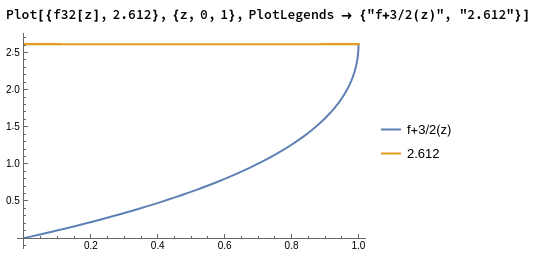

Lo que confirma lo que esta en los libros:

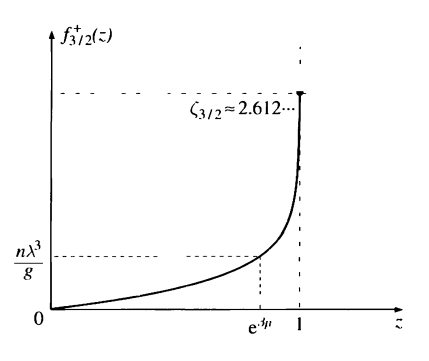

>(Por si se lo están preguntando... no, las **funciones especiales para fermiones $f^-_m(z)$ no tienen ninguna saturación**, y el $z$ puede tomar cualquier valor, o más bien el necesario para fijar cualquier densidad $n \geq 0$. Pueden chequearlo [aquí](https://www.wolframcloud.com/obj/8ba544ec-11c4-4a7d-a639-81f22ccbd46d)).

Asi que ($\lambda \equiv \lambda_T \equiv \lambda_Q$, la longitud de onda térmica, para escribir menos)

\begin{align}
n = \frac{g}{\lambda^3}f^+_{3/2}(z) \leq n^* = \frac{g}{\lambda^3}\zeta_{3/2}\sim \frac{g}{\lambda^3}2.612
\end{align}

>Además, llega a su valor máximo con pendiente infinita en $z=1$. Eso se entiende pues esta la propiedad $d f_{m}^+(z)/dz = f_{m-1}^+(z)/z$. Como $f_{m}^+(z)$ diverge en $z=1$ para $m < 0$, alguna derivada va a explotar. En nuestro caso, como $m=3/2$, $d f_{3/2}^+(z)/dz = f_{1/2}^+(z)/z$, y $f_{1/2}^+(z)/z \to \infty$ cuando $z\to 1$, porque tiene un polo insalvable.


**Observaciones**

* Si subimos $n\lambda_T^3/g$, sube $z$, y por lo tanto sube $\mu$, es decir ser vuelve menos negativo, acercándose a cero (recordar que $\mu \leq 0$ para bosones con solo energía cinética).

* ¿Que potencial químico o fugacidad hay para $n\lambda_T^3/g>2.612$? ¡Si uno evalúa la expresión dá un número complejo!

* ¿No debería estar definida siempre la fugacidad o el potencial químico, para cualquier $N$, $V$ y $T$?

* ¿Cómo hacemos para calcular las otras cantidades que dependen de $z$ si esté no está definido?



> Notar que el número $2.612...$ depende de la dimensión y de la relación de dispersión. En la guía de problemas veremos que pueden aparecer otros números de saturación finitos.

### Ups, ¿metimos la pata?

* Pareciera entonces que no podemos subir $n\lambda_T^3/g$ mas que $2.612$... ¿qué es lo que me impide aumentarlo más?

* ¿Acaso no puedo meter mas partículas a $T$ fijo a partir de cierto momento? ¿Aparece una "repulsión"?

* ¿Acaso no puedo bajar $T$ a $n$ fijo a partir de cierto momento? ¿genera calor desde andentro?

* Por otro lado si asumimos que lo que pasa es que satura tendríamos que $n \sim \lambda^{-3} \propto T^{3/2}$ ¿quiere decir que me desaparece el gas de bosones cuando $T\to 0$? ¿Como pueden desaparecer? Aunque trabajamos en el gran canónico, termodinámicamente podría usar un recipiente cerrado para que no se escapen...

* Pero, ¿como puede ser que la densidad $n$ sature a una $T$ dada? ¿Acaso no puedo reducir el volumen $V$ del recipiente y hacer que aumente $n$ a $N$ y $T$ constantes?

* ¿Falla el ensemble Gran Canónico? ¿Cae fuera de equilibrio el sistema por encima del umbral $n\lambda_T^3 = 2.612$?

* ¿Hay un complot de los bosones para que no aumente más $N/V$ a $T$ constante, o para que no baje $T$ a $N/V$ fijo? 🤯 😱 👽




## Misterio resuelto

La contradicción viene del hecho de que en el cálculo de $n=N/V$ **hemos aproximado la suma sobre estados, que es siempre la posta, por una integral con poco cuidado**.

Es decir

\begin{align}
N &=
g\sum_k \frac{1}{z^{-1}e^{\frac{\beta \hbar^2 k^2}{2m}}-1} \\
&\approx
g V \int \frac{d^3 k}{2\pi^3} \frac{1}{z^{-1}e^{\frac{\beta \hbar^2 k^2}{2m}}-1}
= g V \int \frac{4\pi k^2 dk}{2\pi^3} \frac{1}{z^{-1}e^{\frac{\beta \hbar^2 k^2}{2m}}-1}  \\
&=
\int_0^\infty  \frac{g(\epsilon)d\epsilon}{z^{-1}e^{\beta \epsilon}-1}
=\int_0^\infty  \frac{V A \epsilon^{1/2} d\epsilon}{z^{-1}e^{\beta \epsilon}-1}
\end{align}


El problema es que le dimos un peso cero al estado fundamental relativo al resto de los estados, pero su ocupación es

$$
\frac{1}{z^{-1}e^{\frac{\beta \hbar^2 k^2}{2m}}-1}=
\frac{1}{e^{\beta( \frac{\hbar^2 k^2}{2m}-\mu)}-1}
$$

y varía muy rápido cuando $\frac{\hbar^2 k^2}{2m}-\mu\to 0$ y  como $\mu \leq 0$ el único problema es en realidad el estado fundamental, donde hay un número medio de partículas
$$
N_0 = \frac{g}{z^{-1}-1}=\frac{gz}{1-z}=\frac{g}{e^{-\beta \mu}-1}
$$

De la divergencia en si para $\mu\to 0$ no hay que preocuparse, ya que solo ocurre en el límite termodinámico.
Para ver que $\mu=0$ es solo posible en el límite termodinámico escribimos

\begin{align}
z = \frac{N_0/g}{1+N_0/g}
\end{align}

y como $N_0 \leq N$ (la igualdad vale si $T=0$), si $N$ finito, necesariamente $\mu$ es negativo pero no cero.
El punto importante es que si $N \gg 1$, la ocupación del fundamental puede ser muy grande, ¡incluso más grande que la de todo el resto de los estados excitados juntos!

*La suma tiene un término que le gana a la suma de todos los demás, pero que esta subestimado en la aproximación integral.*

Veremos que el significado de la divergencia (cuando ${\cal E}_{min}=0$) es que *una fracción macroscópica de los bosones se van al estado fundamental* cuando $\mu \to 0$ (cuando $T\to 0$ todos estan en el fundamental). Por esto justamente, al aproximar la suma por la integral *le dimos peso cero al fundamental* en la densidad de estados $g(\epsilon)\sim \epsilon^{1/2}$.

En otras palabras al pasar a la integral le estamos dando un peso $0$ al estado fundamental. Pero, *¡no es la primera vez que lo hacemos!* ¿Hicimos mal todo el tiempo entonces?

* Como $2\pi/L \to 0$ parecería lícito pasar de suma a integral en el límite termodinámica $L\to \infty$... pero, **la función que se suma debe ser suficientemente suave**...

* Con fermiones la función no diverge asi que no hay problema.

* Con bosones el problema solo aparece cuando $\mu \to {\cal E}_{min}=0$ y $N\to \infty$. Claramente, cuando $T\to 0$ tenemos esta situación porque $N_0=N$ en ese límite. Pero, ¿aparece este problema a $T$ finita a una dada $n$, o a una $n$ finita a $T$ fija?









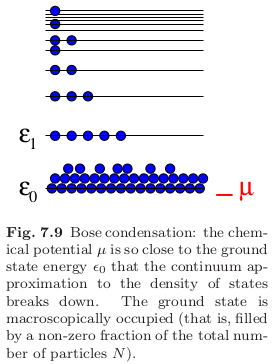

## Condensación de Bose (analíticamente)

Recordemos que

\begin{align}
N &=
\sum_i \frac{1}{z^{-1}e^{\beta \epsilon_i}-1} \\
&= g\sum_k \frac{1}{z^{-1}e^{\frac{\beta \hbar^2 k^2}{2m}}-1} \\
&\approx
\frac{g}{z^{-1}-1}
+
g V \int \frac{d^3 k}{2\pi^3} \frac{1}{z^{-1}e^{\frac{\beta \hbar^2 k^2}{2m}}-1} \\
&= N_0 + g V \int \frac{d^3 k}{2\pi^3} \frac{1}{z^{-1}e^{\frac{\beta \hbar^2 k^2}{2m}}-1} \\
&= N_0 + \int d\epsilon \frac{g(\epsilon)}{z^{-1}e^{\beta \epsilon}-1}=N_0 + \kappa V \int d\epsilon \frac{\epsilon^{1/2}}{z^{-1}e^{\beta \epsilon}-1} \\
&= N_0 + \frac{g_s}{\lambda_T^3}f^+_{3/2}(z)=
N_0 + N_{exc}
\end{align}
y que
\begin{align}
\lambda_T &= \frac{h}{\sqrt{2\pi m k_B T}} \\
f^{\eta}_m(z) &= \frac{1}{(m-1)!}\int_0^\infty \frac{dx\;x^{m-1}}{z^{-1}e^x-\eta} \\
f^{+}_{3/2}(z) &= \frac{1}{(1/2)!}\int_0^\infty \frac{dx\;x^{1/2}}{z^{-1}e^x-\eta}
\end{align}
con $(n-1)!=\Gamma(n)$ la extensión analítica que sirve para evaluar $(1/2)!=\Gamma(3/2)=\sqrt{\pi/2}$.


Arriba definimos $N_0$ como el número medio de bosones en el estado fundamental
\begin{align}
N_0 &= \frac{g z}{1-z} \\
z &= N_0/(g+N_0)
\end{align}
y $N_{exc}$ es el número medio de bosones en estados excitados de una partícula.



* Vemos entonces que $N_0$ es despreciable porque es orden ${\cal O}(1)$ cuando $z\to 0$, es decir cuando $n\lambda_T^3 \ll 1$. Por eso es que no vale la pena separar el estado fundamental en este límite y $N_{exc}\approx N$.

* Sin embargo, cuando $n\lambda_T^3/g \to 2.62\dots$, $z \to 1$, y a partir de ahí el número de partículas en los excitados empieza a decrecer, haciendo que el fundamental tenga adquiera la fracción de $N$ que le pasa $N_{exc}$. Notar que esto pasa tanto bajando $T$ a $n$ fijo, como subiendo $n$ a $T$ fijo.

Esto quiere decir que el cálculo naive que hicimos antes representa en realidad aproximadamente el número de bosones en estados excitados $N_{exc}$. Adimensionalizando la integral queda

\begin{align}
N_{exc} &=  g_s V \int \frac{d^3 k}{2\pi^3} \frac{1}{z^{-1}e^{\frac{\beta \hbar^2 k^2}{2m}}-1} \\
&= \kappa V g_s\int_0^\infty d\epsilon \frac{\sqrt{\epsilon}}{z^{-1} e^{\beta \epsilon}-1} \\
&= \kappa V g_s \beta^{-3/2} \int_0^\infty dx \frac{\sqrt{x}}{z^{-1} e^{x}-1}
\\
n_{exc} &= \frac{N_{exc}}{V} =  \frac{g_s}{\lambda_T^3}f^+_{3/2}(z)
\end{align}


* **La ecuación para $n_{exc}$ es válida en general, para cualquier $z$**.


Precisemos que queremos calcular analíticamente.

* Fijamos $T,V,N$, que es lo usual en un experimento.

* Queremos calcular $N_0=N_0(T,V,N)$.

* Sabemos que $N_0=gz/(1-z)$, asi que necesitaríamos tener $z=z(T,V,N)$.

* Para tener $z=z(T,V,N)$ podemos usar que, mientras $z < 1$ o $\frac{N \lambda_T^3}{V g_s} < f^+_{3/2}(1)$ es cierto que
$$\frac{N}{V}=\frac{g}{\lambda_T^3}f^+_{3/2}(z)$$
pero es complicado de invertir analíticamente.
Sin embargo, sabemos que en este caso $N_0/N \to 0$ o $N_{exc}\approx N$.

* Si $\frac{N \lambda_T^3}{V g_s} > f^+_{3/2}(1)$ en cambio, sabemos que $z=1$ y que
$$
\frac{N_{exc}\lambda_T^3}{V g_s} = f^+_{3/2}(1)
$$
por lo tanto como $N_0=N-N_{exc}$




## Temperatura crítica y parámetro de orden de la condensación

Viniendo desde el límite clásico $z \ll 1$ tenemos
$$
n = N/V = \frac{V g_s}{\lambda_T^3} f^+_{3/2}(z) < \frac{V g_s}{\lambda_T^3} f^+_{3/2}(1)
$$

* Entonces, si bajamos $T$ manteniendo $n$ fijo, $z$ necesariamente tiene que subir con $T$ para compensar el cambio $T^{3/2}$ que produce $\lambda^3_T$.

* Existe una $T=T_c > 0$ tal que no podemos mover más $z$ para satisfacer la ecuación y mantener $n$ fijo. La $T_c$ entonces cumple
$$
\frac{N\lambda_{T_c}^3}{V g_s} = f^+_{3/2}(1)
$$

Por lo tanto podemos obtener la *temperatura crítica dependiente de la densidad únicamente*
\begin{align}
T_c(n) &=
k_B^{-1}\left[
\frac{n(\frac{h}{\sqrt{2\pi m}})^3}{f^+_{3/2}(1) g_s}
\right]^{2/3}
= \frac{h^2}{2\pi m k_B} \left( \frac{n}{g\zeta_{3/2}} \right)^{2/3}
\end{align}
asi que
\begin{align}
\boxed{
T_c(n) = \frac{h^2}{2\pi m k_B} \left( \frac{n}{g\zeta_{3/2}} \right)^{2/3}
}
\end{align}

Notar las dependencias: $T_c$ crece con la densidad $n=N/V$ y decrece aumentando el espín o la masa de las partículas.

Como nada me impide seguir bajando $T$ a $n$ fijo, necesitamos entender que esta pasando. Lo que ocurre es que el estado fundamental, que tenía un número no extensivo de partículas, pasa a tener uno extensivo, *macroscópico*.

* $T_c$ es la mínima temperatura a la cual el número de excitados $N_{exc}$ es igual al total de partículas $N$. Bajando más $T$ el $N_{exc}$ empieza a decaer con $z=0$.  Entonces, igualando los dos $f^+_{3/2}(1)$, tenemos
$$\frac{N\lambda_{T_c}^3}{V g_s} = \frac{N_{exc}\lambda_T^3}{V g_s}$$
entonces
$$
\frac{\lambda_{T_c}^3}{\lambda_{T}^3} = \left[\frac{T}{T_c}\right]^{3/2}
= \frac{N_{exc}}{N} = 1-\frac{N_0}{N}
$$

* Llegamos así a la fracción condensada por debajo de $T_c$, que sirve como *parámetro de orden* de la transición
$$
\boxed{
\frac{N_0}{N} = 1-\left[\frac{T}{T_c(n)}\right]^{3/2}
}
$$
en acuerdo con la simulación numérica.

* Notar además que (usando $\text{Series[1-x**(3/2),{x,1,2}]} \approx (3/2)(1-x)+(3/8)(1-x)^2$, alrededor de $T_c(n)$ tenemos
$$
\frac{N_0}{N} = 1+\left[\frac{T_c(n)-T}{T_c(n)}-1\right]^{3/2}
\approx \frac{3}{2}(T_c(n)-T)
$$
y asi podemos verlo como un *fenómeno crítico* con parámetro de orden
$$
\boxed{
N_0/N \sim (T_c-T)^\tilde{\beta}
}$$
con exponente crítico $\tilde{\beta}=1$. Comparar con el experimento numérico.


Lo que ocurre en $T_c$ es realmente singular en el límite $N\gg 1$
\begin{align}
\frac{N_0}{N} &= 1-\left[\frac{T}{T_c(n)}\right]^{3/2},\;\; T< T_c(n) \\
\frac{N_0}{N} &= 0,\;\; T> T_c(n) \\
z &= \frac{N_0}{g_s+N_0}\;\; \text{siempre}
\end{align}



En síntesis, para $n$ **fijo**,  tenemos entonces esta secuencia

| **Temperatura** | **Fugacidad** | **Excitados** | **Fundamental** | **$N_{exc}/N$** | **$N_{0}/N$** |
|--------------|--------------|----------------|----------------|----------------|---------------|
| $$T > T_c(n)$$  | $$z<1$$ |  $$N_{exc} = N = \frac{V g_s}{\lambda_{T}^3} f^+_{3/2}(z)$$ |  $$N_0/N=(g_s/N)/(z^{-1}-1)$$ | $$1$$ | $$0$$ |
| $$T = T_c(n)$$   | $$z=1$$ |  $$N_{exc} = N = \frac{V g_s}{\lambda_{T}^3} f^+_{3/2}(1)$$ |  $$N_0/N = 0$$ | $$1$$ | $$0$$ |
| $$T < T_c(n)$$  | $$z=1$$ |  $$N>N_{exc} = \frac{V g_s}{\lambda_{T}^3} f^+_{3/2}(1)=N(T/T_c)^{3/2}$$ |  $${N_0}=N[1-(T/T_c)^{3/2}]$$ | $$0 < x_{exc} < 1$$ | $$0 < x_0 < 1$$ |
| $$T = 0$$    | $$z=1$$ |   $$N_{exc}=0$$ |  $$N_0=N$$ | $$0$$ | $$1$$ |

Observaciones:

* En realidad $z$ siempre es un poquito menor a $z=1$, solo en en límite termodinámico alcanza ese límite, pero en la práctica no podemos resolver la diferencia.



El número de partículas lo podemos fijar, $N = N_0 + N_{exc}$, o la densidad $n=N/V$. Entonces, $N_0=N-N_{exc}$ o $n_0=n-n_{exc}$.


Cuando $T< T_c(n)$ tenemos que reemplazar $n_{exc}=n^*(T)$. Es decir por el valor saturado dependiente de $T$ que empieza a decrecer como $T^{3/2}$ bajando la $T$. Entonces $n_0$ tiene que subir de modo de mantener el número constante.



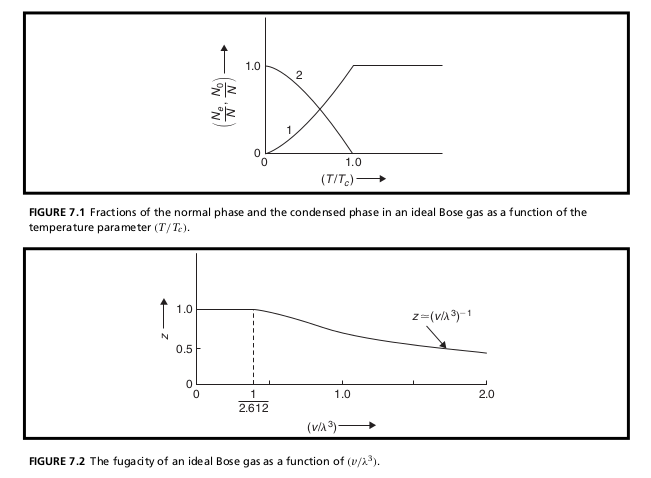

## Experimentos pensados

* Bajar $T$ a $N$, $V$ fijos:
  * La saturación $z\to 1$ se alcanza en $T_c(n)$, y se clava en ese valor para $T < T_c(n)$.
  * $N_0/N \ll 1$ se vuelve $N_0/N \sim 1$ para $T < T_c(n)$.
  * $N_{exc}/N = 1$, pasa a ser $N_{exc}/N < 1$ para $T < T_c(n)$ y baja hasta cero bajando más $T$.

* Agrego partículas a $T,V$ fijo:
  * Como aumenta $T_c(n)$ en algún momento $T < T_c(n)$, entonces ¡el mismo número de partículas agregadas irán a parar al estado fundamental! Los estados excitados no pueden recibir más partículas.

* Bajar $V$ a $T$ fijo:
  * $n$ y la $T_c(n)$ aumentan, y cuando $T< T_c(N)$ se empiezan a mudar partículas de los excitados al fundamental.

Para $T < T_c(n)$ hay una fracción macroscópica en el estado fundamental y todos ellos *están en el mismo estado cuántico*, en un estado cuántico *macroscópico*. El número crece hasta que todas las partículas están en el fundamental a $T=0$


## Condensación de Bose (numérico)

**La suma siempre es la posta** El tema es que es más fácil en general hacer la integral que la aproxima y parchar con el número importante que se nos escurrió.
Sin embargo, podemos hacer las sumas numéricamente y convencernos de que las conclusiones que sacamos con este método son correctas.

La idea es

* Calcular la densidad de estados discreta y exacta ${\cal N}(E)$ (4.26) usando sumas, hasta una energía máxima $E_{max}$, usando *naive-degeneracy-cube*. Con esta podremos luego evaluar más fácilmente el número medio de partículas.

* Fijar un número $\langle N \rangle$ de partículas y usar bisección con *grandcan-bosons* con la densidad de estados ${\cal N}(E)$ para extrer el $\mu$, en función de $N\equiv \langle N \rangle$ y $T$.

* Con el $N$ y $T$ fijados y el $\mu$ correspondiente podemos calcular el número de partículas en el fundamantal $N_0$, en particular la fracción condensada $N_0/N$ en función de la temperatura.

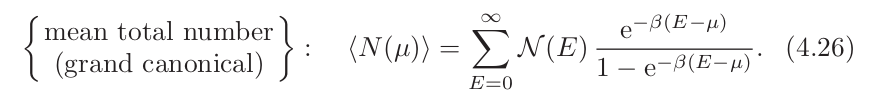

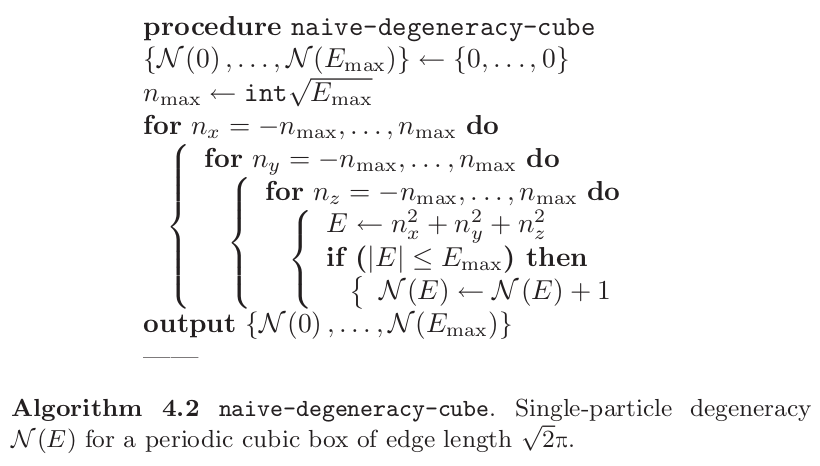

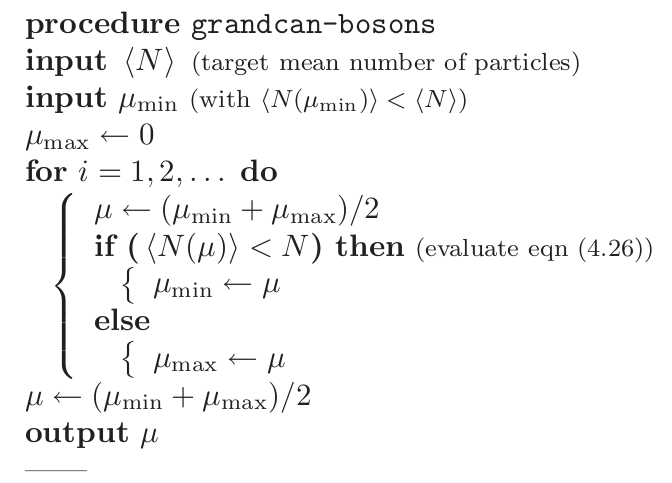

Aquí va una implementación (no eficiente) del pseudocódigo de arriba para
[Bosones en una Caja](https://colab.research.google.com/drive/1hdyM32FDyBaVJIiWf4_Nx8HQ__8tXzml?usp=sharing)

Es muy instructivo entender el código, explorar variantes e interpretar los resultados para entender que es la condensación de Bose-Einstein.

Este simple experimento numérico muestra

* A $T \neq 0$ fijo  y $V$ fijos, para $N$ suficientemente grande, $\mu \to 0$ eventualmente. Ocurre para un $N_c$ que es tanto más grande cuanto más grande $T$.

* A $T$ grande, y $N$ bajo, $\mu$ se hace negativo y grande, consistente con el límite de Maxwell-Boltzmann.

* La fracción condensada pasa de $N_0/N\approx 0$ a altas $T$, a $N_0/N = 1$ para $T\to 0$. Pero lo como hace continuamente a partir de una $T_c(N)>0$, como un **fenómeno crítico**.

* La $T_c(N)\sim N^{2/3}$. Como tiene que ser intensiva, y hemos adimensionalizado antes, en realidad se traduce a $T_c(N)\sim (N/V)^{2/3} = n^{2/3}$.

* Notar que sale aproximadamente lineal $N_0/N \sim T-T_c(N)$ para $T \lesssim T_c(N)$, es decir con un exponente crítico $\beta=1$ (no confundir con $1/k_BT$.

* El comportamiento crítico es más claro cuando $N \to ∞$. Hay efectos de tamaño finito, como suele ocurrir en transiciones de fase.



Ahora, si fijo una $T$ suficientemente baja, vemos que $\mu \to 0$ cuando $N\to \infty$. Si $T$ es alta en cambio, se ve que $\mu$ llega a un valor negativo que depende de $T$. Hay una *singularidad* en $\mu$ vs $T$ para $N\to \infty$.

¿Les suena a algo?

**Es una transición de fase en un sistema no interactuante cuántico, y se llama condensación de Bose-Einstein**

*¿Pero como, no era que sin interacciones no había transiciones de fase?*

Bueno, eso era clásicamente o en la estadística de Maxwell-Boltzmann, pero con la estadística de Bose-Einstein no es necesario...

Pero, por otro lado, ya vimos que los efectos cuánticos de degeneración de intercambio se traducen en interacciones atractivas efectivas, si uno reinterpreta las correcciones al gas ideal como el desarrollo del virial de un potencial efectivo de interacción...




Teniendo el $\mu$, dados $T$ y $N$, puedo calcular $N_0=g z/(1-z)$, con $z=e^{\beta \mu}$, y encontramos este comportamiento *singular*

Lo que se puede ver es que si la temperatura es mas baja que cierta $T_c$ el número de partículas en el estado fundamental se vuelve macroscópica, es decir, una fracción del total! O sea, es *enorme*. Por debajo de esa $T_c$, $\mu=0$ en el límite $N\to \infty$.

Y a $N\to \infty$ el punto en $T_c$ es singular. Vamos a ver que hay una transición de fase de hecho.


## La "función de onda macroscópica"

Para $T < T_c(n)$ hay una fracción macroscópica en el estado fundamental y todos ellos *están en el mismo estado cuántico*, en un estado cuántico *macroscópico*.

La función de onda para todos esos bosones es la misma, $\psi_0({\bf r})$, y el producto está ya simetrizado
$\psi_0({\bf r_2})\psi_0({\bf r_2})\dots\psi_0({\bf r_N})$, de modo que la probabilidad de encontrar una partícula en ${\bf r}$ es simplemente

$$p({\bf r}) \approx N_0|\psi_0({\bf r})|^2$$

cosa bastante espectacular porque quiere decir que


* *¡la densidad de probabilidad de una partícula controla la densidad de todas las partículas!*


Un estado típico sería por ejemplo $| N_0, 3, 2, 0, 1, 0, \dots \rangle$, de modo que es de esperar que este dominado por el fundamental. Como el estado fundamental tiene propiedades especiales, podemos ahora esperar consecuencias termodinámicas especiales.

Veremos entonces que pasa con la presión y las funciones de respuesta, la compresibilidad y el calor específico.

## Presión y ecuación de estado

Recordemos que la presión en el gran canónico es

\begin{align}
PV &= k_B T \ln {\cal Z} \\
\beta P &= \frac{\ln {\cal Z}}{V}
\end{align}

y que

\begin{align}
{\cal Z}
&= \prod_i \sum_{n=0}^\infty e^{-\beta(\epsilon_i-\mu)n}
= \prod_i \frac{1}{1-e^{-\beta(\epsilon_i-\mu)}} \\
\ln {\cal Z} &= -\sum_i \ln[1-e^{-\beta(\epsilon_i-\mu)}]
\end{align}

lo que sigue es convertir la suma sobre estados en integral, usando la densidad de estados $g(\epsilon)\sim \epsilon^{1/2}$. Como ya sospechamos que puede pasar algo en el fundamental, separamos el término correspondiente


\begin{align}
\beta P = -\frac{2\pi g}{h^3} (2m)^{3/2} \int_0^\infty
\epsilon^{1/2} \ln[1-z e^{-\beta \epsilon}]d\epsilon
- \frac{\ln[1-z]}{V}
\end{align}

Vemos entonces que a bajas temperaturas o altas densidades

$$\beta P_0=-V^{-1}\ln(1-z)\sim V^{-1} \ln(N_0+1)$$

y por lo tanto por debajo de $T_c(n)$ es subextensiva, es decir, que es despreciable, $P_0 \approx 0$. Un argumento físico es que la presión solo tiene contribución de los estados excitados, porque en el fundamental las partículas tienen momentos despreciables en el límite termodinámico (recordar que el momento va como $k\sim L^{-1}$). Entonces la expresión que ya teníamos, que sale de integrar por partes la del integrando con el logaritmo, sigue siendo correcta *para toda temperatura*

\begin{align}
\beta P = \frac{g}{\lambda^3}f_{5/2}^+(z)
\end{align}

Sin embargo, eso no quiere decir que no pasa nada, pues $z$ a $n$ fijo tiene un comportamiento singular: cuando $T < T_c$, $\mu=0$ y se pega ahí bajando más $T$, tenemos una sorpresa, una nueva saturación, pero esta vez de una combinación de presión con temperatura,

\begin{align}
\beta P &= \frac{g}{\lambda^3}\zeta_{5/2} \approx 1.341 \frac{g}{\lambda^3}
\end{align}

* Pueden chequearlo ustedes mismos [aqui](https://www.wolframcloud.com/obj/f369fb1b-20a3-49d0-9057-b01708cb280e)



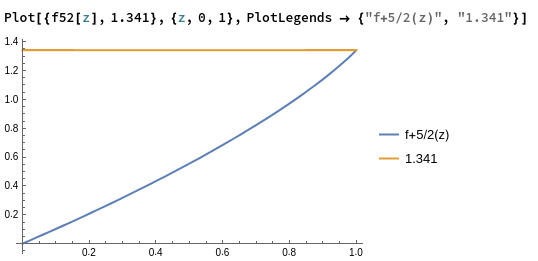

de la que concluimos que, para $T < T_c(n)$,

\begin{align}
\beta P &= \frac{g}{\lambda^3}\zeta_{5/2} \approx 1.341 \frac{g}{\lambda^3}\\
P &\sim T^{5/2}
\end{align}

y *la presión es independiente de la densidad*, a diferencia de lo que ocurre para $T> T_c$ (pues ahí el potencial químico depende de $T$ de tal forma de fijar la densidad de excitados, con un total macroscópico). De hecho, para $T\gg T_c(n)$,
$PV=N k_B T$ o $P=n k_B T$, depende de $n$.

Sobre una isoterma entonces (ver $P$ vs $1/n$ a distintas $T$ abajo), $P$ crece bajando $n$ hasta que $T=T_c(n)$, y empieza la condensación, y $P$ no depende más de $n$, desarrollando un plateau.
>Notar que el plateau de $P$ vs $v$ que empieza en $T_c$ se parece mucho al pleateau de la condensación clásica con interacciones atractivas, y puede pensarse en coexistencia de un gas y un "líquido". En ese sentido se parece una transición de primer orden.

Algunas observaciones:

* *La presión entonces se anula bajando temperatura*, a diferencia de la saturación de $P_F$ en el caso de fermiones.

* La $T_c(n)$ marca cuando empiezan a dominar los excitados y aumentando $T$ llegamos al límite clásico, que depende de la densidad.

* La curva de $P$ vs $T$ a $n$ (ver figura) fijo tiene una singularidad en $T_c$ en el límite $N\to \infty$.





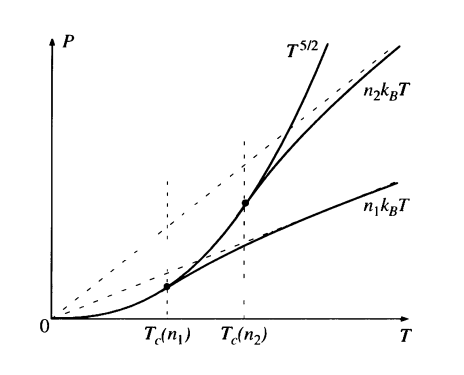

Comparar ahora con Fermi-Dirac y Maxwell-Boltzmann. A bajas $T$ solo se anula $P$ en el caso $BE$ y $MB$, pero $BE$ se anula más rápido. A $T$ alta (no mostrado), todo tiende a $P=n k_B T$. Las
desviaciones empieza a ser importantes en $T_F$ para fermiones y $T_c$ para bosones.

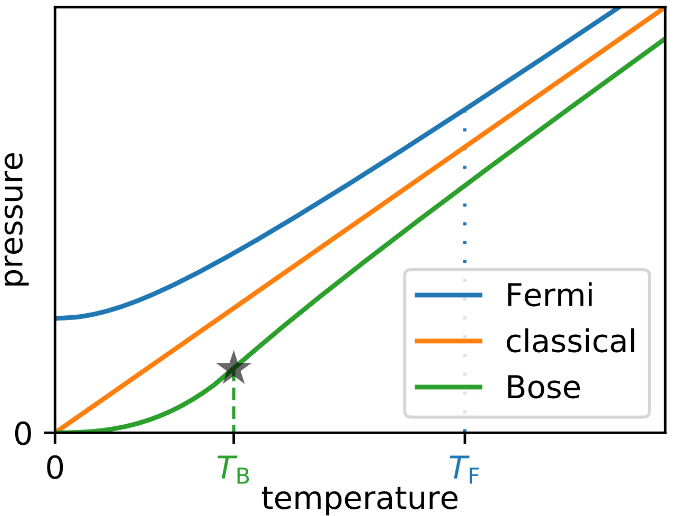

* Las isotermas de $P$ vs $1/n$ o volumen específico también tienen una singularidad en $1/n_c(T)$, y para volúmenes específicos más chicos la presión alcanza el valor de saturación que proviene de los cada vez menos bosones en estados excitados.

* Como para $T=T_c$, tenemos $n^* \sim \lambda^{-3} \sim T_c^{3/2}$ y $P \sim T_c^{5/2}$, tenemos que $P^* \sim (n^*)^{5/3} = (1/n^*)^{-5/3}= v^{-5/3}$, donde $v$ es el volumen específico. La línea $P^*$ vs $1/n^*$ divide el diagrama $P$ vs $1/n$ en la región del condensado de la normal.


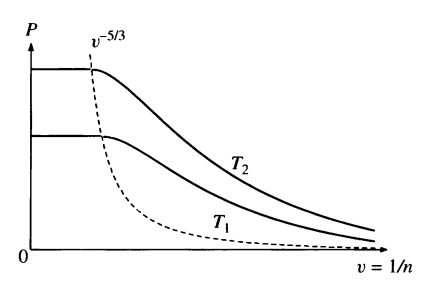

## Calor latente

En la *línea de coexistencia*, $\beta P_c = \frac{g_s}{\lambda_{T_c}^3}f^+_{5/2}(1)$, con $T=T_c(n)$.

En esa línea en $P$ vs $T$ podemos aplicar la ecuación de Clausius-Clapeyron que relaciona la derivada con el salto de volumen y de entropía en la transición.
\begin{align}
\frac{dT}{dP} = \frac{\Delta V}{\Delta S} = \frac{T_c(v^* - v_0)}{L}
\end{align}

donde dividimos y multiplicamos por $N$ para expresar en términos del volumen específico, y del calor latente por partícula $L$ y donde artificialmente $v_0=0$.

Como $\beta P = \frac{g}{\lambda^3}f^+_{5/2}(1)
= a T^{-3/2}$ o $P = b T^{5/2}$ en la línea, tenemos
\begin{align}
dP/dT|_{coexistencia} &= \frac{5}{2} b T^{3/2} = \frac{5}{2} b T^{5/2} T^{-1}
= \frac{5}{2}\frac{P}{T}
\end{align}

Reemplazando tenemos
\begin{align}
L = \frac{5}{2}\frac{\zeta_{5/2}}{\zeta_{3/2}}k_B T_c \approx 1.28 k_B T_c
\end{align}
por partícula. En este sentido la condensación de Bose-Einstein es similar a una de primer orden.



## Compresibilidad isotérmica

Por otro lado tenemos la compresibilidad isotérmica a $T$ constante

$$\kappa_T = \frac{\partial_P n|_T}{n}$$

El truco es sacarse de encima $z$ calculando

\begin{align}
\frac{dP}{dz}&= \frac{g_s k_B T}{\lambda_T^3} \frac{1}{z}f^+_{3/2}(z) \\
\frac{dn}{dz}&=
\frac{g_s}{\lambda_T^3} \frac{1}{z}f^+_{1/2}(z)
\end{align}

entonces

$$\kappa_T=\frac{f^+_{1/2}(z)}{n k_B T f_{3/2}^+(z)}$$

Es fácil ver que diverge en $T_c$ porque cuando $z\to 1$ la presión se vuelve independiente de la densidad. Matemáticamente la culpa la tiene $f^+_{1/2}(z)$, ver gráfica abajo.

Fisicamente esto nos dice que el sistema se vuelve infinitamente compresible a $T_c$, y cualquier variación de la presión conduce a un cambio gigantesco de la densidad relativa. ¡Contrasta enormemente con los fermiones!





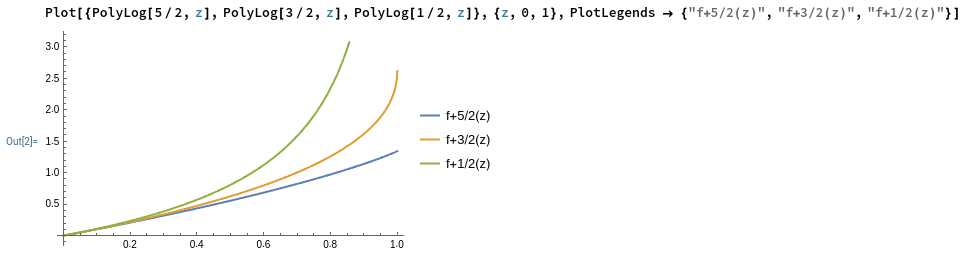

## Calor específico

La energía media por unidad de volumen es proporcional a la presión, que ya calculamos.

\begin{align}
E = \frac{3}{2}PV = \frac{3}{2} V \frac{g}{\lambda_T^3} k_B T f^{+}_{5/2}(z) \propto T^{5/2}f^{+}_{5/2}(z)
\end{align}

Para la capacidad calorífica tenemos que derivarla respecto de la temperatura, a número de partículas y volumen fijos.

\begin{align}
\frac{dE}{dT}|_{N,V} \propto
\left[(5/2)T^{3/2}f^{+}_{5/2}(z)+T^{5/2}\frac{f^{+}_{3/2}(z)}{z} \frac{dz}{dT}\right]
\end{align}

donde usamos la propiedad $d_z f^{+}_{m}(z)=f^{+}_{m-1}(z)/z$.

Como el número de partículas lo suponemos constante podemos usar

\begin{align}
\frac{dN}{dT}|_V=0=\frac{g}{\lambda_T^3}V \left[ \frac{3}{2T}f_{3/2}^+ + \frac{1}{z} f_{1/2}^+(z) \frac{dz}{dt}|_{V,N} \right]
\end{align}

entonces, reemplazando $$(T/z)dz/dT=(-3/2)(f^+_{3/2}(z)/f^+_{1/2}(z)$$
tenemos
\begin{align}
\frac{C_V}{V k_B} = \frac{3}{2} \frac{g}{\lambda_T^3}
\left[ \frac{5}{2}f_{5/2}^+(z) - \frac{3}{2} \frac{(f^+_{3/2}(z))^2}{f^+_{1/2}(z)} \right]
\end{align}

Para dibujarlo vs $T$, tenemos que tener en cuenta que a $T < T_c(N)$ hay un cambio de comportamiento porque $z=1$, asi que toda la dependencia en $T$ queda controlada por $\lambda_T$.
Es medio complicado dibujarla sin embargo, porque necesitamos despejar $z$ para $N$ fijo (numéricamente, con el algoritmo de la bisección, ¡no hay drama!). Entonces es más conviente mirar el límite de altas $T$ y el de $T < T_c$.


Para $T < T_c(n)$: $C_V \approx T^{3/2}$ (y vale la tercera ley de la termodinámica).


Para $T > T_c(n)$: podemos expandir la expresión entre corchetes de $C_V$ en $z$.
Recordar que en mathematica $f^+_{m}(z)\equiv \text{PolyLog}[m,z]$. Se puede hacen en mathematica, ver [el notebook](https://www.wolframcloud.com/obj/f369fb1b-20a3-49d0-9057-b01708cb280e).


\begin{align}
\frac{C_V}{V k_B} &=
\frac{3}{2} \frac{g}{\lambda_T^3}
\left[z+\frac{5 z^2}{8 \sqrt{2}}+\dots\right] \\
\frac{C_V}{N k_B} &=
\frac{3}{2} \frac{g}{n\lambda_T^3}
\left[z+\frac{5 z^2}{8 \sqrt{2}}+\dots\right] \\
&= \frac{3}{2}
\left[1+ \frac{g}{n\lambda_T^3}\frac{5 z^2}{8 \sqrt{2}}+\dots\right] \\
&= \left[1+ \frac{g}{n\lambda_T^3}\frac{5 z^2}{8 \sqrt{2}}+\dots\right]
= \left[1+ \frac{5 n\lambda_T^3}{g_s 8 \sqrt{2}}+\dots\right]
\end{align}

Por lo tanto es más grande que el límite clásico $C_V=(3/2)N k_B$.

*En la expansión hay un factor 5 de diferencia con el libro de Kardar...(errata?)*

Juntando las dos cosas llegamos al dibujo de más abajo.
Necesariamente tenemos una cúspide en $T_c$.











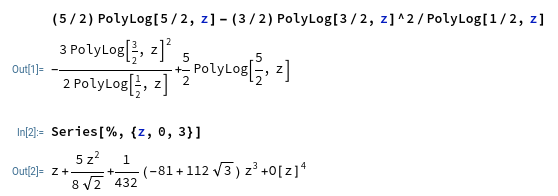

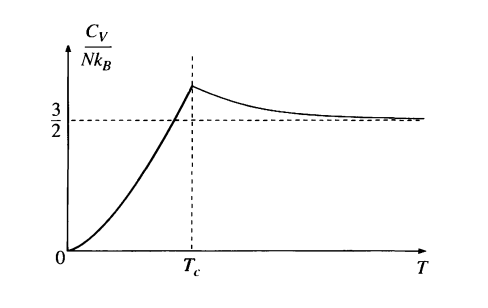

Se puede entender "con los dedos", porque va como $C_V \sim T^{3/2}$ a bajas $T$. A $T=0$ están todas las partículas en el fundamental, y a $T$ bajitas se empiezan a ocupar los excitados hasta una energía aproximadamente $\hbar^2 k_m^2/2m \sim k_B T$ y cada uno de los estados excitados tiene una energía proporcional a $k_B T$, entonces $E_{exc}\sim V k_m^d k_B T \sim T^{d/2}$.  

## Fase "condensada"

En realidad existe una fase mixta por debajo de $T_c$, que puede pensarse como dos fluídos: un gas, y un líquido parcialmente condensado con propiedades bastante extrañas debido a su naturaleza cuántica macroscópica.

* Si controlo $v=V/N$ y $P$ puedo encontrar el gas o la fase parcialmente condensada.

* Si controlo $P$ y $T$ en cambio, la fase parcialmente condensada solo vive en una línea porque hay una presión máxima.

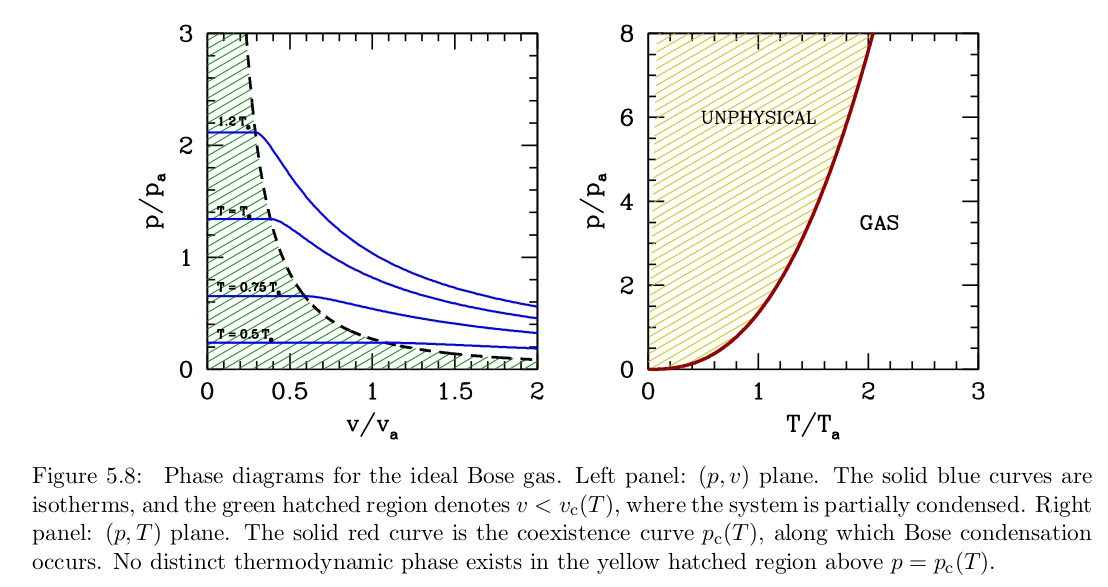

Comparar con el gas de Van der Walls:

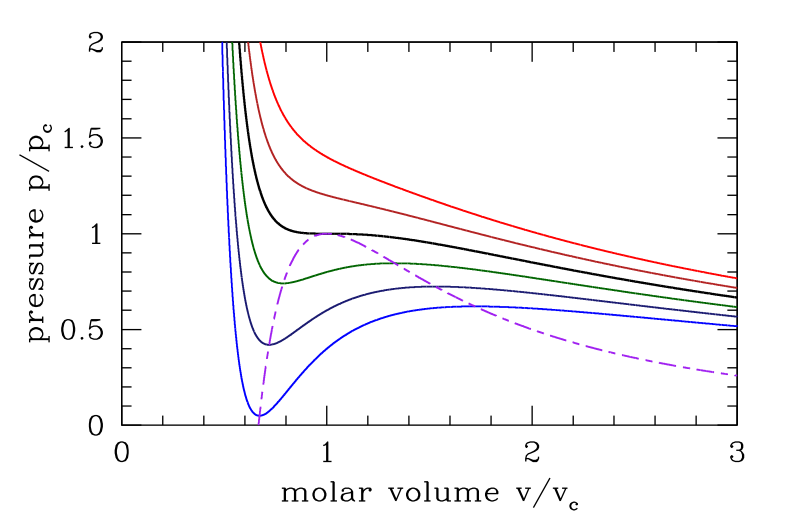

Cuando hay interacciones hay si una transición de fase de un gas a un *superfluído* (ejemplo Helio 4) con propiedades muy interesantes

* No se solidifica nunca debido a fluctuaciones cuánticas.

* Moja todo.

* Tiene entropía cero.

* No disipa energía cuando se lo mueve o pasa por tubos, no importa que finito sea este.

* hay diferencias entre el condensado de BE y el superfluído.

## Condiciones para que exista una condensación de Bose-Einstein

La condición fundamental para que exista una $T_c(n)$ finita es que el número de partículas en estados excitados sature a $T$ fija cuando $z=1$ o $\mu\to 0$, ya que eso implica que tiene que aparecer una fracción macroscópica en el fundamental, signo de la fase condensada.

Como $f_m^+ (z)$ son funciones monótonamente crecientes con $z$ en $0 \leq z \leq 1$, el máximo valor se alcanza cuando $z\to 1$, y es

\begin{align}
\zeta_m = f_m^+ (1) = \frac{1}{(m-1)!} \int_0^\infty \frac{x^{m-1}}{e^x-1}dx
\end{align}

Como hay un polo en $x=0$ para que no diverja la integral necesitamos el integrando para $x \ll 1$, $x^{m-2}$, sea integrable. Entonces la condición es $m>1$.

En general, si la densidad de estados es general, basta ver como se comporta cerca de ${\cal E}_{min}$. Si se salva el polo hay transición, sino no hay.
Es decir, lo importante en general es que $g(\epsilon)/(e^{\beta (\epsilon-{\epsilon}_{min})}-1)$ sea integrable para $\beta (\epsilon-{\epsilon}_{min})\ll 1$.


* Por ejemplo, para partículas no relativistas en dos dimensiones, $m=1$ porque la densidad de estados $g(\epsilon)$ es constante para $\epsilon>0$. Entonces no hay transición, y tampoco hay transición en $d=1$ porque $g(\epsilon)$ decrece con $\epsilon$. En cambio en $d=3,4,\dots$, siempre hay transición porque $g(\epsilon)$ crece cada vez más rápido a medida que aumentamos $d$.




En el dibujo de abajo vemos que solo m=3/2, 5/2 saturan a distintos valores, pero m=1/2 diverge. De hecho, Los valores que se obtienen son

\begin{align}
f^+_{5/2}(1)&=1.34149\\
f^+_{3/2}(1)&=2.61238 \\
f^+_{3/2}(1)&=\infty
\end{align}


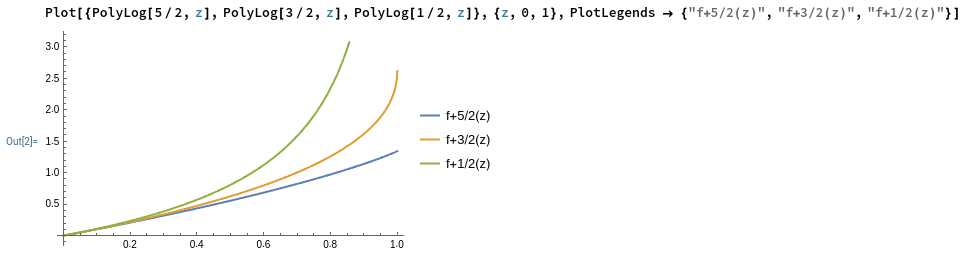

## Aplicaciones y experimentos

Esto lo voy a contar en [esta](https://docs.google.com/presentation/d/1tJYjKAwolvaW3SBQSbBZtlAHHfEVhngCDJw669XEvKE/edit?usp=sharing) charlita.

Por mucho tiempo se creyó que no era posible observar la condensación de Bose-Einstein, porque antes los gases se volverían líquidos o sólidos.

Predicho en 1924, recién se logró observarlo en [1995](https://en.wikipedia.org/wiki/Bose%E2%80%93Einstein_condensate).

Para lograrlo necesitaron enfriar un gas muy diluído a temperaturas de aproximadamente 170 nK. Al principio lo hicieron con Rb y Na. Hoy en día se hace con muchos otros tipos de partículas.

Es necesario aislar las partículas completamente. Se usan trampas magneto ópticas, que explotan el momento magnético de los átomos. Los lasers se usan para enfriar a los átomos.


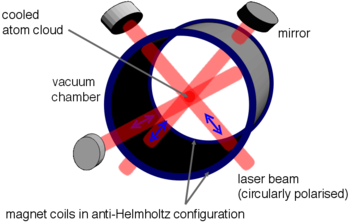

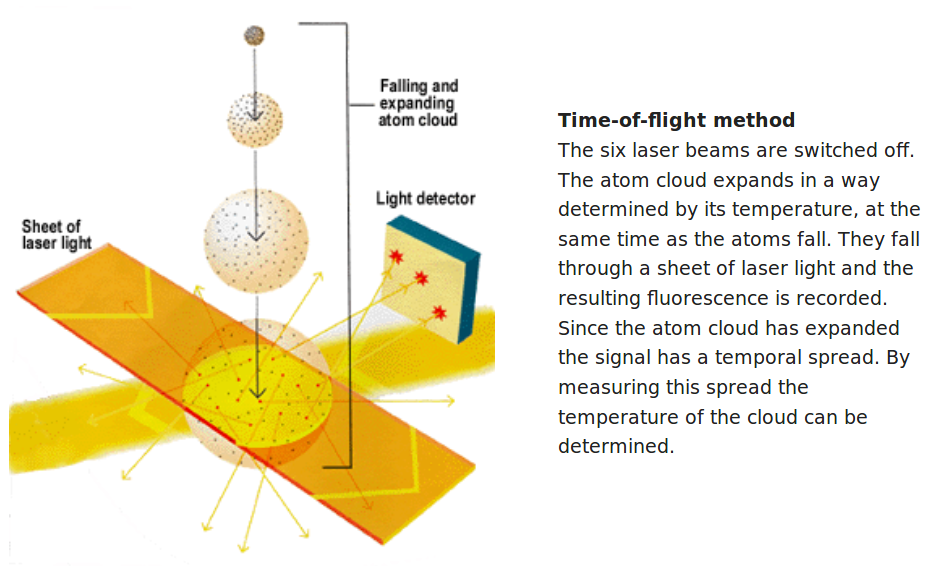

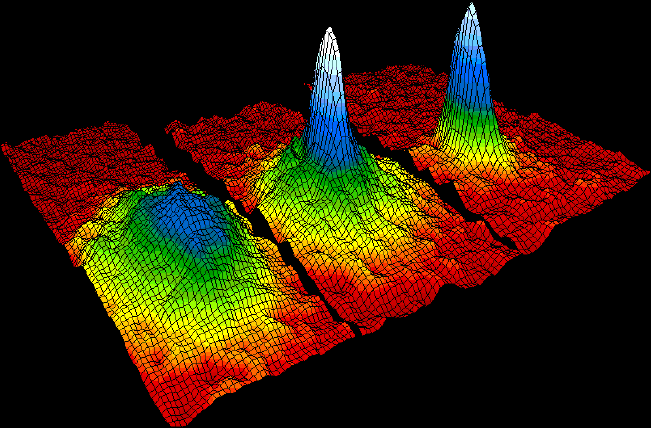

La probabilidad de encontrar una particula es muy distinta por encima o por debajo de $T_c$.

Por debajo, la distribución es la que corresponde a la función de onda de **una** sola partícula en el estado fundamental. Si la trampa es armónica, la distribución es gausiana, pero su desviación estandard no depende de la temperatura. Es el módulo cuadrado de la función de onda macroscópica, el estado fundamental del oscilador armónico.

Por encima de $T_c$ da también una gausiana, pero la desviación estandard de esta si depende de $T$, como prodríamos haber predicho usando estadística clásica $p(x) \sim e^{-\beta \kappa x^2/2}/Z$.

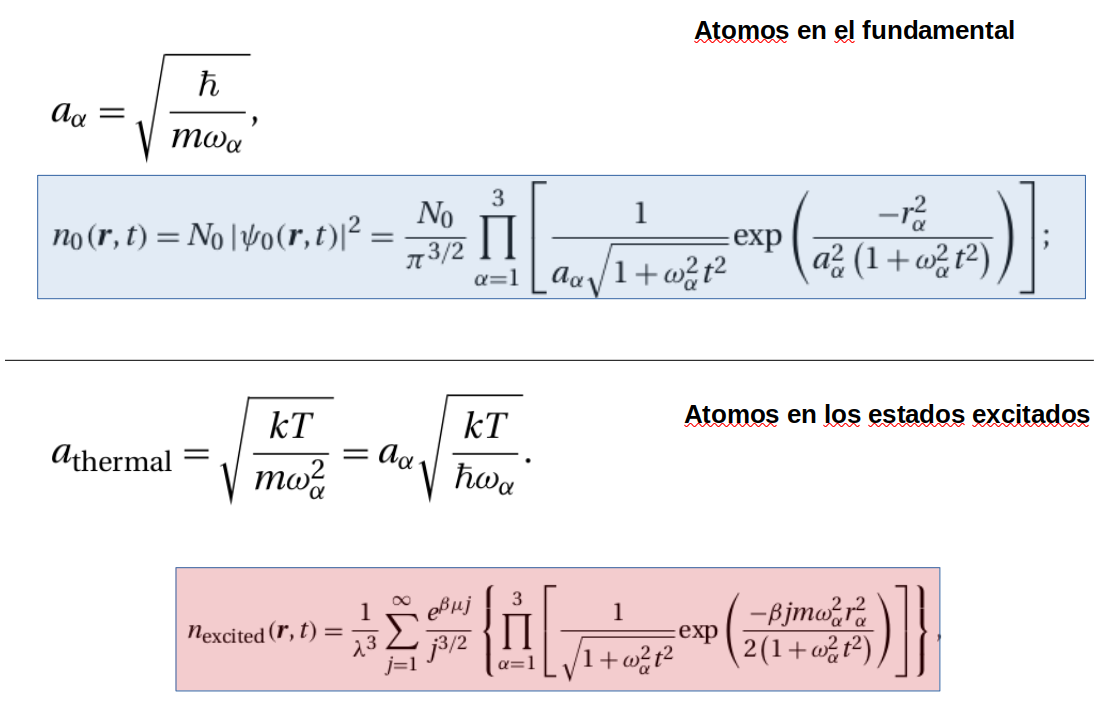